In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv(r"C:\Users\USER\Downloads\temperature_pressure_data.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [20]:
df.drop(columns=["sno"],inplace=True)
print(df)

   Temperature  Pressure
0            0    0.0002
1           20    0.0012
2           40    0.0060
3           60    0.0300
4           80    0.0900
5          100    0.2700


<AxesSubplot:>

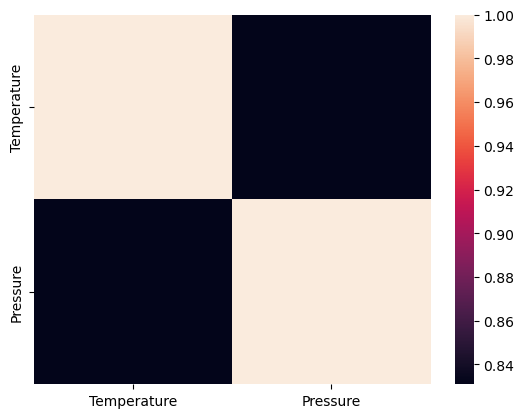

In [21]:
sns.heatmap(df.corr())

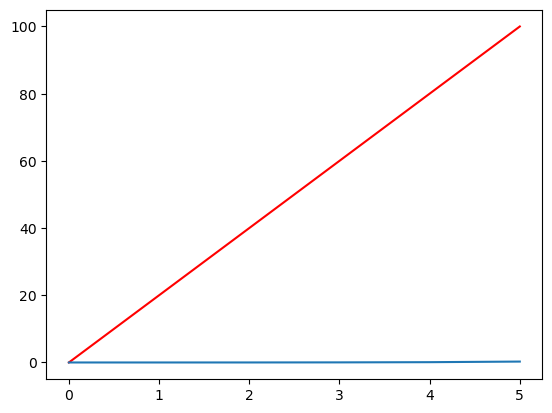

In [22]:
plt.plot(df["Temperature"],color="r")
plt.plot(df["Pressure"])

In [23]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x)
print(y)

[[  0]
 [ 20]
 [ 40]
 [ 60]
 [ 80]
 [100]]
[2.0e-04 1.2e-03 6.0e-03 3.0e-02 9.0e-02 2.7e-01]


In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

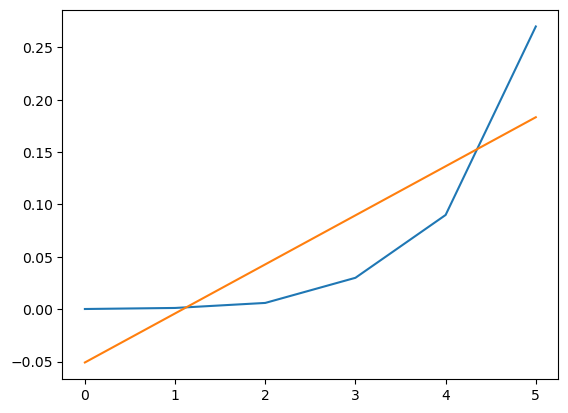

In [25]:
plt.plot(y)
plt.plot(y_pred)

In [26]:
from sklearn.metrics import mean_absolute_percentage_error
mpae=mean_absolute_percentage_error(y_pred,y)
mpae

0.773422332728626

In [27]:
#so here huge bias
#here we use polynomial regression to optimize errors
#deg INCR features INCR errorrs DECR
#DO POLYNOMIAL REGRESSION



# POLYNOMIAL REGRESSION

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [33]:
poly.fit(x_poly,y)
model2=LinearRegression()
model2.fit(x_poly,y)
y_poly_pred=model2.predict(x_poly)
y_poly_pred

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

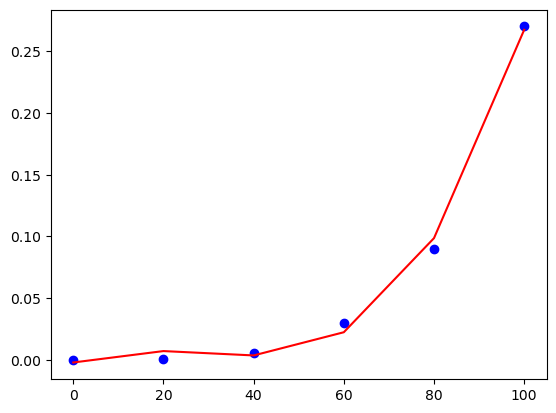

In [30]:
plt.scatter(x,y,color='b')
plt.plot(x,y_poly,color='r')

In [31]:
from sklearn.metrics import mean_absolute_percentage_error
print("Polynomial error per is",mean_absolute_percentage_error(y,y_poly))

Polynomial error per is 2.7865912208767987


In [32]:
from sklearn.metrics import r2_score

# Assuming y and y_pred are numpy arrays or lists of the same length
print("Simple regression R² score is", r2_score(y, y_pred))
print("Polynomial regression R² score is", r2_score(y, y_poly))


Simple regression R² score is 0.690349972603981
Polynomial regression R² score is 0.9966691251761722
